In [ ]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



In [2]:
# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)


# Combine the data into a single dataset
merged_data_df = ride_data_df.merge(city_data_df, on = "city")

# Display the data table for preview
merged_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


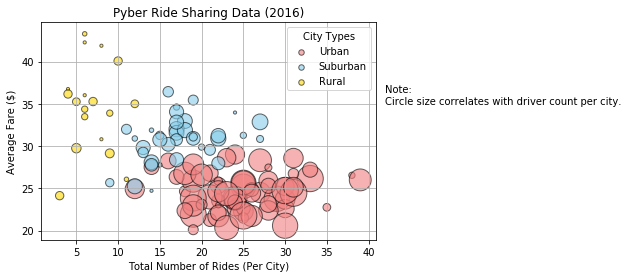

In [3]:
# Bubble Plot of Ride Sharing Data
# Average Fare ($) Per City
# Total Number of Rides Per City
# Total Number of Drivers Per City
# City Type (Urban, Suburban, Rural)

# Obtain the x and y coordinates for each of the three city types
urban_rides_per_city = merged_data_df[merged_data_df["type"] == "Urban"]
urban_x_axis = urban_rides_per_city.groupby("city").count()["ride_id"]
urban_y_axis = urban_rides_per_city.groupby("city").mean()["fare"]
urban_size = (10*urban_rides_per_city.groupby("city").mean()["driver_count"])

suburban_rides_per_city = merged_data_df[merged_data_df["type"] == "Suburban"]
suburban_x_axis = suburban_rides_per_city.groupby("city").count()["ride_id"]
suburban_y_axis = suburban_rides_per_city.groupby("city").mean()["fare"]
suburban_size = (10*suburban_rides_per_city.groupby("city").mean()["driver_count"])

rural_rides_per_city = merged_data_df[merged_data_df["type"] == "Rural"]
rural_x_axis = rural_rides_per_city.groupby("city").count()["ride_id"]
rural_y_axis = rural_rides_per_city.groupby("city").mean()["fare"]
rural_size = (10*rural_rides_per_city.groupby("city").mean()["driver_count"])

urban_size
# Build the scatter plots for each city types
plt.scatter(urban_x_axis, urban_y_axis, marker="o", facecolors="#f08080", edgecolors="black", s=urban_size, alpha=0.6)
plt.scatter(suburban_x_axis,suburban_y_axis, marker = "o",facecolors= "#87ceeb", edgecolors="black",s=suburban_size,alpha=0.6)
plt.scatter(rural_x_axis, rural_y_axis, marker = "o", facecolors = "gold",edgecolors = "black",s=rural_size,alpha=0.6)

# Incorporate the other graph properties

# Create a legend
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()
lgnd = plt.legend( ["Urban","Suburban","Rural"],title= "City Types", loc = "upper right", scatterpoints=1, fontsize=10)

for i in range(len(lgnd.legendHandles)):
    lgnd.legendHandles[i]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42,35,"Note:\nCircle size correlates with driver count per city.", fontsize = 10)
plt.title("Pyber Ride Sharing Data (2016)")
# Save Figure
plt.savefig("Images/pyberbubble.png")

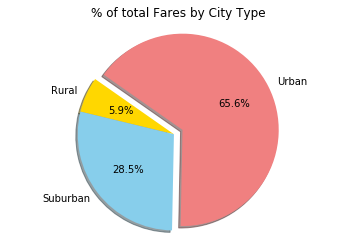

In [4]:
# Total Fares by City Type
 
# Calculate Type Percents
fares_by_city  = merged_data_df.groupby(by=["fare","type"],as_index = False)
info_pie_chart_fares = fares_by_city.count().groupby("type")["fare"].count()
info_pie_chart_fares
colors = ["gold", "#87ceeb","#f08080" ]
explode = [0,0,0.1]
# # # Build Pie Chart
plt.pie(info_pie_chart_fares, labels = info_pie_chart_fares.index , colors = colors, startangle=145, autopct = "%.1f%%", explode= explode, shadow=True)
plt.title("% of total Fares by City Type")
plt.axis("equal")
# # Save Figure
plt.savefig("Images/faresbycity.png")

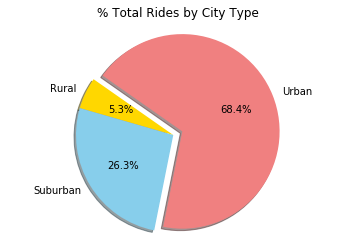

In [5]:
# Total Fares by City Type
 
# Calculate Type Percents
rides_by_city  = merged_data_df.groupby("type")
info_pie_chart_rides = rides_by_city["ride_id"].count()
info_pie_chart_rides
colors = ["gold", "#87ceeb","#f08080" ]
explode = [0,0,0.1]
 # Build Pie Chart
plt.pie(info_pie_chart_rides, colors = colors, labels = info_pie_chart_rides.index ,startangle=145, autopct = "%.1f%%", explode= explode, shadow=True)
plt.axis("equal")
plt.title("% Total Rides by City Type")
# Save Figure
plt.savefig("Images/ridesbycity.png")

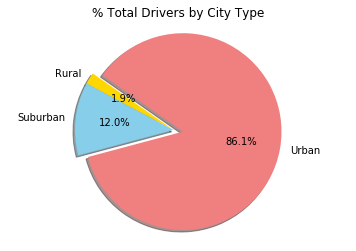

In [6]:
# Total Fares by City Type
 
# Calculate Type Percents
drivers_by_city  = merged_data_df.groupby(by = ["driver_count","type"], as_index = False)
info_pie_chart_drivers = drivers_by_city.count().groupby("type")["driver_count"].sum()
info_pie_chart_drivers
colors = ["gold", "#87ceeb","#f08080" ]
explode = [0,0,0.1]
# # Build Pie Chart
plt.pie(info_pie_chart_drivers, colors = colors, labels = info_pie_chart_drivers.index ,startangle=145, autopct = "%.1f%%", explode= explode, shadow=True)
plt.axis("equal")
plt.title("% Total Drivers by City Type")
# # Save Figure
plt.savefig("Images/driversbycity.png")

In [7]:
# Three observable trends

print("According to the data analyzed, the amount of drivers per city type and number of rides increment the more \n\
urban the city type. Rural cities have less number of drivers and less number of rides, while urban cities have \n\
a larger number of drivers and of rides\n")
print("The data also shows that the fewer drivers and rides there are, the more expensive the average fare of each ride \n\
will be, this also correlates with the city types, where rural cities with fewer drivers tend to have a higher\n\
fare in average\n")
print("The over all data leads us to think that the behaviour of cities, number of drivers, fare amount and number of rides are \n\
intricately related. Anyone trying to find a Pyber ride should consider what type of city they're in: If in a rural city, \n\
they'll probably find higher fares and fewer drivers, but also fewer people riding with the app. On the other hand, if a \n\
rider is in an urban setting, they'll probably see lower fares, more drivers available and also more people riding with the\n\
app\n")

According to the data analyzed, the amount of drivers per city type and number of rides increment the more 
urban the city type. Rural cities have less number of drivers and less number of rides, while urban cities have 
a larger number of drivers and of rides

The data also shows that the fewer drivers and rides there are, the more expensive the average fare of each ride 
will be, this also correlates with the city types, where rural cities with fewer drivers tend to have a higher
fare in average

The over all data leads us to think that the behaviour of cities, number of drivers, fare amount and number of rides are 
intricately related. Anyone trying to find a Pyber ride should consider what type of city they're in: If in a rural city, 
they'll probably find higher fares and fewer drivers, but also fewer people riding with the app. On the other hand, if a 
rider is in an urban setting, they'll probably see lower fares, more drivers available and also more people riding with the
app

